In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [23]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [24]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,3.543021,1.516816,-0.223218,-1.950320,-2.966985,1
1,0.077292,1.570523,1.120677,0.846284,-0.435122,1
2,-1.392100,-0.274991,-0.995898,-2.361192,3.155866,1
3,2.362099,1.165660,0.444681,-0.469077,-1.724290,1
4,1.597017,0.228538,-1.000042,-2.710454,0.069026,1


In [25]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [26]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [27]:
# function for combined sampling
import random
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [28]:
df1 = combined_sampling(df,0.5,0.5)

In [29]:
df2 = combined_sampling(df,0.5,0.5)

In [30]:
df3 = combined_sampling(df,0.5,0.5)

In [31]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'target'], dtype='object')
Index(['col4', 'col2', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')


In [32]:
df3

,col5,col2,target
95,-0.859137,2.099422,0
62,1.061411,-0.110297,0
7,2.044463,0.669876,0
69,-1.318271,1.412500,1
7,2.044463,0.669876,0
48,1.784355,0.768887,1
52,-1.417803,1.030297,1
77,-0.541832,1.474738,0
4,0.069026,0.228538,1
80,1.540812,0.286613,1


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [36]:
from sklearn.model_selection import train_test_split
x  = df.iloc[:,0:5]
x
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [37]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
from sklearn.tree import plot_tree

[Text(0.43478260869565216, 0.9375, 'x[4] <= -0.133\ngini = 0.499\nsamples = 80\nvalue = [42, 38]'),
 Text(0.21739130434782608, 0.8125, 'x[0] <= -1.62\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.32608695652173914, 0.875, 'True  '),
 Text(0.13043478260869565, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.30434782608695654, 0.6875, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.6521739130434783, 0.8125, 'x[2] <= 0.233\ngini = 0.334\nsamples = 52\nvalue = [41, 11]'),
 Text(0.5434782608695652, 0.875, '  False'),
 Text(0.4782608695652174, 0.6875, 'x[4] <= 3.031\ngini = 0.206\nsamples = 43\nvalue = [38, 5]'),
 Text(0.391304347826087, 0.5625, 'x[4] <= 0.243\ngini = 0.172\nsamples = 42\nvalue = [38, 4]'),
 Text(0.17391304347826086, 0.4375, 'x[0] <= -1.042\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.08695652173913043, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2608695652173913, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6

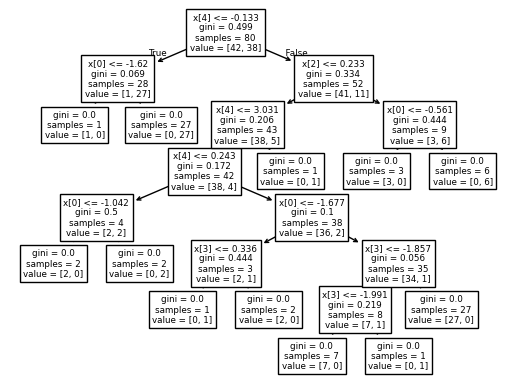

In [39]:
plot_tree(clf1)

[Text(0.43478260869565216, 0.9375, 'x[4] <= -0.133\ngini = 0.499\nsamples = 80\nvalue = [42, 38]'),
 Text(0.21739130434782608, 0.8125, 'x[0] <= -1.62\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.32608695652173914, 0.875, 'True  '),
 Text(0.13043478260869565, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.30434782608695654, 0.6875, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.6521739130434783, 0.8125, 'x[2] <= 0.233\ngini = 0.334\nsamples = 52\nvalue = [41, 11]'),
 Text(0.5434782608695652, 0.875, '  False'),
 Text(0.4782608695652174, 0.6875, 'x[4] <= 3.031\ngini = 0.206\nsamples = 43\nvalue = [38, 5]'),
 Text(0.391304347826087, 0.5625, 'x[4] <= 0.243\ngini = 0.172\nsamples = 42\nvalue = [38, 4]'),
 Text(0.17391304347826086, 0.4375, 'x[0] <= -1.042\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.08695652173913043, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2608695652173913, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6

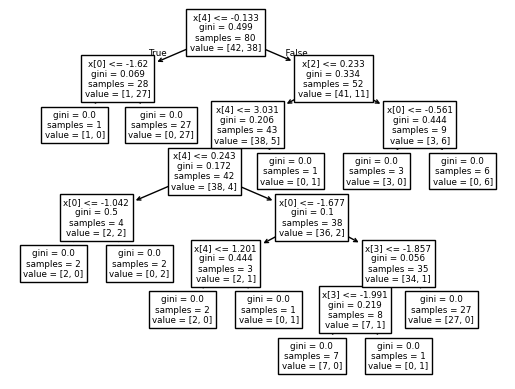

In [40]:
plot_tree(clf2)

[Text(0.43478260869565216, 0.9375, 'x[4] <= -0.133\ngini = 0.499\nsamples = 80\nvalue = [42, 38]'),
 Text(0.21739130434782608, 0.8125, 'x[0] <= -1.62\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.32608695652173914, 0.875, 'True  '),
 Text(0.13043478260869565, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.30434782608695654, 0.6875, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.6521739130434783, 0.8125, 'x[2] <= 0.233\ngini = 0.334\nsamples = 52\nvalue = [41, 11]'),
 Text(0.5434782608695652, 0.875, '  False'),
 Text(0.4782608695652174, 0.6875, 'x[4] <= 3.031\ngini = 0.206\nsamples = 43\nvalue = [38, 5]'),
 Text(0.391304347826087, 0.5625, 'x[4] <= 0.243\ngini = 0.172\nsamples = 42\nvalue = [38, 4]'),
 Text(0.17391304347826086, 0.4375, 'x[0] <= -1.042\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.08695652173913043, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2608695652173913, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6

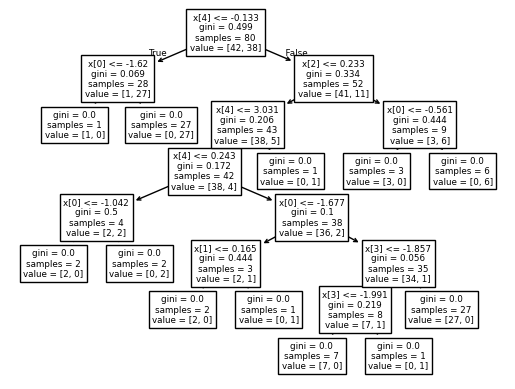

In [41]:
plot_tree(clf3)

In [45]:
y_pred = clf1.predict(x_test)
y_pred1= clf2.predict(x_test)
y_pred2 = clf3.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
print('Accuracy of model 1 :',accuracy_score(y_test,y_pred))
print('Accuracy of model 2 :',accuracy_score(y_test,y_pred1))
print('Accuracy of model 3 :',accuracy_score(y_test,y_pred2))

Accuracy of model 1 : 0.9
Accuracy of model 2 : 0.95
Accuracy of model 3 : 0.9


In [47]:
from sklearn.metrics import confusion_matrix
print('confusion Matrix of model 1 :',confusion_matrix(y_test,y_pred))
print('confusion Matrix of model 2 :',confusion_matrix(y_test,y_pred1))
print('confusion Matrix of model 3 :',confusion_matrix(y_test,y_pred2))

confusion Matrix of model 1 : [[ 8  0]
 [ 2 10]]
confusion Matrix of model 2 : [[ 8  0]
 [ 1 11]]
confusion Matrix of model 3 : [[ 8  0]
 [ 2 10]]
